In [1]:
####################################################################
###    This is the PYTHON version of program 2.6 from page 41 of   #
### "Modeling Infectious Disease in humans and animals"            #
### by Keeling & Rohani.										   #
###																   #
### It is the SEIR epidemic with equal births and deaths.          #
### Note we no-longer explicitly model the recovered class.	       #
####################################################################

In [2]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

*mu is the per capita death rate, and the population level birth rate.

*beta is the transmission rate and incorporates the encounter rate between susceptible and infectious individuals together with the probability of transmission.

*gamma is called the removal or recovery rate, though often we are more interested in its reciprocal (1/γ) which determines the average infectious period.

*sigma is the rate at which individuals move from the exposed to the infectious classes. Its reciprocal (1/σ) is the average latent (exposed) period.

*S0 is the initial proportion of the population that are susceptible.

*E0 is the initial proportion of the population that are exposed (infected but not infectious)

*I0 is the initial proportion of the population that are infectious

In [3]:
mu=1/(70*365.0)
beta=520/365.0
sigma=1/4.0
gamma=1/7.0
ND=365.0
TS=1.0
S0=0.9
E0=1e-4
I0=1e-4
INPUT = (S0, E0, I0)

In [4]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP    
	Y[0] = mu - beta * V[0] * V[2] - mu * V[0]
	Y[1] = beta * V[0] * V[2] - sigma * V[1] - mu * V[1]
	Y[2] = sigma * V[1] - gamma * V[2] - mu * V[2]
	return Y   # For odeint

In [5]:
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

Rec=1. - (RES[:,0]+RES[:,1]+RES[:,2])
print(RES)

[[ 9.00000000e-01  1.00000000e-04  1.00000000e-04]
 [ 8.99863907e-01  2.02275356e-04  1.22123197e-04]
 [ 8.99685290e-01  3.20075106e-04  1.66504476e-04]
 ...
 [ 1.23913151e-02 -1.05985735e-12  2.03894813e-11]
 [ 1.24299684e-02 -1.18812129e-12  1.99770505e-11]
 [ 1.24686202e-02 -1.31676446e-12  1.95473434e-11]]


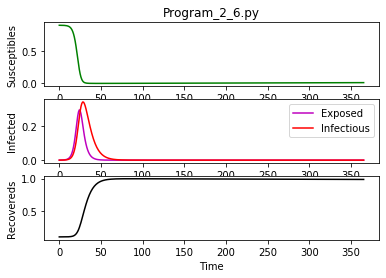

In [6]:
#Ploting
pl.subplot(311)
pl.plot(RES[:,0], '-g', label='Susceptibles')
pl.title('Program_2_6.py')
pl.xlabel('Time')
pl.ylabel('Susceptibles')
pl.subplot(312)
pl.plot(RES[:,1], '-m', label='Exposed')
pl.plot(RES[:,2], '-r', label='Infectious')
pl.legend(loc=0)
pl.xlabel('Time')
pl.ylabel('Infected')
pl.subplot(313)
pl.plot(Rec, '-k', label='Recovereds')
pl.xlabel('Time')
pl.ylabel('Recovereds')
pl.show()